# einops in TensorCast.jl

<img src="https://github.com/arogozhnikov/einops/blob/master/docs/resources/einops_logo_350x350.png?raw=true" width="175" heigh="175" align="right">
<img src="https://github.com/JuliaGraphics/julia-logo-graphics/blob/master/images/julia-logo-325-by-225.png?raw=true" width="162" height="112" align="right">


I wrote [a Julia package](https://github.com/mcabbott/TensorSlice.jl) to do reshaping and slicing of tensors, and then realised that this is precisely the functionality of the [`einops`](https://github.com/arogozhnikov/einops) Python package. 

Since they have [a very nice tutorial](https://github.com/arogozhnikov/einops/blob/master/docs/1-einops-basics.ipynb), I decided to simply borrow and adapt it.

In addition to such reshaping etc, TensorCast.jl also treats arbitrary broadcasting operations (mentioned briefly at the end of this file). See also [Einsum.jl](https://github.com/ahwillia/Einsum.jl) and [TensorOperations.jl](https://github.com/Jutho/TensorOperations.jl) for other index-notation packages in Julia.

## Downloading

In [1]:
# These are the packages we will need:
using Pkg
pkg"add TensorCast NPZ Images QuartzImageIO Colors Flux"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed DiffRules ─ v0.0.9
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [b552c78f] ↑ DiffRules v0.0.8 ⇒ v0.0.9


In [2]:
# First we download exactly the same data:

test_name = download("https://github.com/arogozhnikov/einops/blob/master/docs/resources/test_images.npy?raw=true")

using NPZ # NPZ is a package for reading Numpy arrays
npy = npzread(test_name)

size(npy) # There are 6 images of shape 96x96 with 3 color channels packed into 4-tensor

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146    0   146    0     0    412      0 --:--:-- --:--:-- --:--:--   413
100   157  100   157    0     0    262      0 --:--:-- --:--:-- --:--:--  153k
100 1296k  100 1296k    0     0  1113k      0  0:00:01  0:00:01 --:--:-- 1113k


(6, 96, 96, 3)

size(six) = (6,)
size(six[1]) = (3, 96, 96)


,,,,,

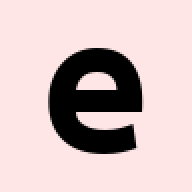
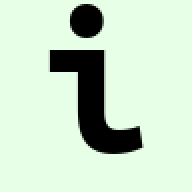
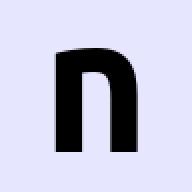
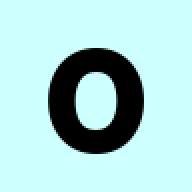
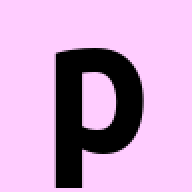
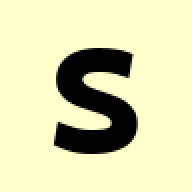

In [3]:
# Here's our first use of @cast to make a vector of the six images, each as a 3 × 96 × 96 array. 

using TensorCast

@cast six[n][c, h,w] := npy[n, h,w, c]; # (explained just below!)

@show size(six)
@show size(six[1])

using Images, Colors # "colorview" expects the color information in the first index, not the last,
                     # (because Julia's arrays are column-major, the opposite of Numpy).

colorview.(RGB, six) # this is == [ colorview(RGB, img) for img in six ]

In [4]:
# The notation of `@cast` here is almost literally what is true at each value of the indices,
# with := the instruction to make a new array. Let's check all of them, no errors:

@cast six[n][c, h,w] := npy[n, h,w, c];

for n=1:6, c=1:3, h=1:96, w=1:77
    six[n][c, h,w] == npy[n, h,w, c] || @error "failure at n=$n, c=$c, h=$h, w=$w" maxlog=5
end

## Reshaping with `@cast`

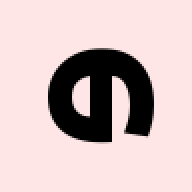

In [5]:
# Take the first image and swop the axes, i.e. transpose it: 

img = six[1]; 
@cast transposed[c, w,h] := img[c, h,w]

colorview(RGB, transposed)

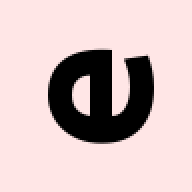

In [6]:
# To rotate instead, we need to reverse one of the axes, which can be done with a minus: 

img = six[1]; 
@cast rotated[c, w,h] := img[c, h,-w]

colorview(RGB, rotated)

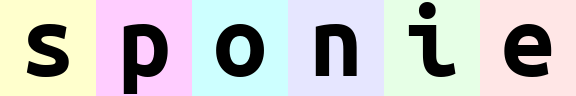

In [7]:
# To combine several images into one, we introduce a combined index, written "(w,n)" or "w\n". 
# The more compact form also reminds you which is which: the "macroscopic" index goes on top. 

@cast row[c, h, (w,n)] := six[-n][c, h,w]
@cast row[c, h,  w\n ] := six[-n][c, h,w]  # identical

# Note that I also put a minus in front of n, which reverses the order of the letters, but not their pixels: 

colorview(RGB, row)

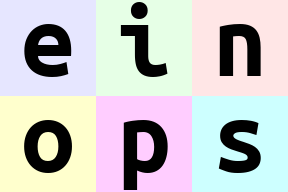

In [8]:
# We can use the same combined index notation on the RHS, 
# and here we divide the batch index into two, n -> W\H, which are the grid position on the LHS. 

# Since any grid could be written this way, we need also to specify that we want 2 rows of 3,
# otherwise you'll get "ArgumentError: unable to infer ranges for indices H, W" 

# Here is the notation for that: you add a range (or a tuple of ranges) after the equation:  

@cast grid[c, h\H, w\W] := six[W\H][-c, h,w]  (H:2)

colorview(RGB, grid)

size(separate) = (288, 576)
typeof(separate) <: AbstractMatrix = true


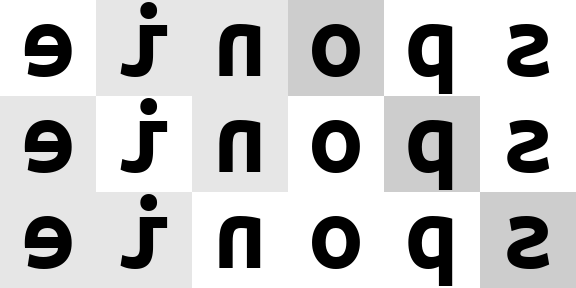

In [9]:
# Another example: combine the color and the height indices into the grid's height,
# and reverse the width pixel positions w (but not the horizontal grid position, W):

@cast separate[h\c, w\W] := six[W][c, h,-w] 

@show size(separate) typeof(separate) <: AbstractMatrix # actual type reflexts lazy reshape

Gray.(separate) # Gray is a number type, this converts Float64 to it. 

## Reducing with `@reduce`

,

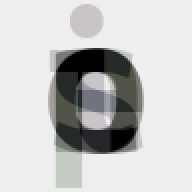
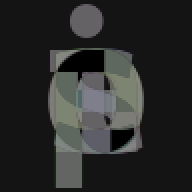

In [10]:
# The @reduce macro has notation much like you would write in LaTeX: $A_i = \sum_j B_{i,j}$
# That is, you have to specify the index being reduced over, and you do it right of the equals sign. 

# The macro doesn't care what function you use, as long as it understands sum(B, dims=2),
# as many do. Here then are the mean and std.dev of the six images:

using Statistics # standard library

@reduce average[c, h,w] := mean(n) six[n][c, h,w]   # same as average = mean(six) in fact

@reduce deviation[c, h,w] := std(n) npy[n, h,w, c]  # here working from original npy instead

colorview.(RGB, [average, deviation])

,,,

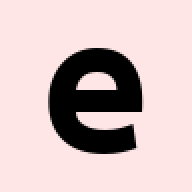
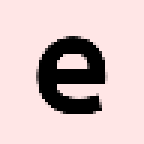
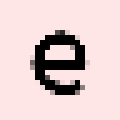
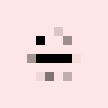

In [11]:
# Max-pooling: Here we divide each image axis into a short and a long component 
# (exactly as for @shape) and then reduce along the short one. 

img = six[1]
@reduce maxpool2[c, h,w] := maximum(α,β) img[c, α\h, β\w]  α:2, β:2

@reduce maxpool4[c, h,w] := maximum(α:4, β:4) img[c, α\h, β\w] # can also specify ranges inside 
@reduce maxpool8[c, h,w] := maximum(α:8, β:8) img[c, α\h, β\w]

colorview.(RGB, [img, maxpool2, maxpool4, maxpool8])

,,,

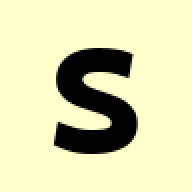
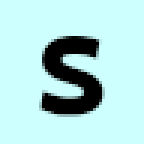
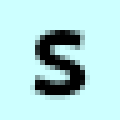
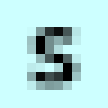

In [12]:
# The reduction function does not have to be something built-in. 
# Here's a root-mean-squared functions which takes the expected dims keyword: 

rms(A; dims) = sqrt.(mean(A .* A; dims=dims))

img = six[end]
@reduce rms2[-c, h,w] := rms(α:2, β:2) img[c, α\h, β\w]  
@reduce rms4[-c, h,w] := rms(α:4, β:4) img[c, α\h, β\w]
@reduce rms8[-c, h,w] := rms(α:8, β:8) img[c, α\h, β\w]

colorview.(RGB, [img, rms2, rms4, rms8])

## Fixed indices

In [13]:
# What einops calls "0 axes" are output dimensions in which the relevant index has only one value. 
# Such things are useful for aligning dimensions where some broadcasting operation expects them to be. 

@cast gaps[c,_,h,_,w,n] := six[n][c,h,w] # you can write 1 or _ 
size(gaps)

(3, 1, 96, 1, 96, 6)

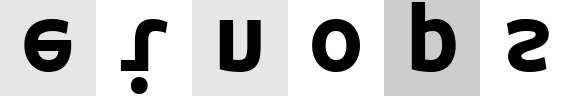

In [14]:
# You may also fix an index on the input side, which takes a single slice. 
# Here we take only the 2nd colour channel, almost equivalent to npy[:,:,:,2]:

# @cast bluechannel[h,w\n] := six[n][2,h,w] error right now, sorry
@cast bluechannel[-h, w\n] := npy[n,h,w,2]

cblue = 2 # to interpolate a variable, use a dollar sign: 
@cast bluechannel[-h, w\n] := npy[n,h,w, $cblue] # same result

Gray.(bluechannel) # with h reversed, too

## Extras: `@pretty`, broadcasting, `@check!`, arbitrary arrays

In [15]:
# This whole package only runs when your code is being loaded, 
# and produces actual Julia code to do the work later. 
# To see what happens, use the @pretty macro: 

@pretty @cast bluechannel[-h, w\n] := npy[n,h,w,2]

begin
    local sz = (size(npy, 2), size(npy, 3), size(npy, 1))
    local jellyfish = PermutedDimsArray(view(npy, :, :, :, 2), (2, 3, 1))
    bluechannel = reshape(reverse(jellyfish, dims=1), (sz[1], sz[2] * sz[3]))
end


In [16]:
@pretty @reduce deviation[c, h,w] := std(n) npy[n, h,w, c]

begin
    local jellyfish = PermutedDimsArray(npy, (4, 2, 3, 1))
    deviation = dropdims(std(jellyfish, dims=4), dims=4)
end


begin
    local sz = (size(npy, 4), size(npy, 2), size(npy, 3), size(npy, 1))
    local jellyfish = PermutedDimsArray(npy, (4, 2, 3, 1))
    sixdark = reshape((-).(1, (^).(jellyfish, 3)), (sz[1], sz[2], sz[3] * sz[4]))
end


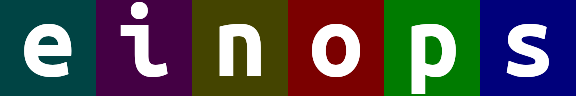

In [17]:
# Besides "re-casting" the same data into different shapes, the macro @cast also provides 
# another way to access all of Julia's broadcasting machinery (hence the name).
# Here, f(x) = 1 - x^3 is applied to every number, turning white into black in each channel: 

@pretty @cast sixdark[c, h, w\n] := 1 - npy[n, h,w, c]^3 # print the operation, as above

@cast sixdark[c, h, w\n] := 1 - npy[n, h,w, c]^3

colorview(RGB, sixdark)

In [18]:
# There is one more macro, and one more version of each...
# @check! aims to allow sanity checks of index-notation expressions, 
# by saving (to a dictionary) what kind of letter should appear in each slot. 

@check! npy[n, h,w, c] # saves what letters to expect

A = rand(2,2,2)
@check! A[i,j,k]

TensorCast.index_store

Dict{Symbol,Tuple} with 2 entries:
  :A   => (:i, :j, :k)
  :npy => (:n, :h, :w, :c)

In [19]:
@check! npy[n, w,h, c]; # compains using "@error", but still runs

@check! A[j,i,k] # does not complain, as i & j are nearby letters (you can adjust how near is OK)

┌ Error: @check! npy[n, w, h, c] now has index w where previously it had h
└ @ Main In[19]:1
┌ Error: @check! npy[n, w, h, c] now has index h where previously it had w
└ @ Main In[19]:1


2×2×2 Array{Float64,3}:
[:, :, 1] =
 0.68462    0.112153
 0.0323062  0.852852

[:, :, 2] =
 0.751227  0.394068 
 0.202148  0.0417655

┌ Info: Recompiling stale cache file /Users/me/.julia/compiled/v1.1/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1184


extrema(trgrad) = (-4.0, 4.0)


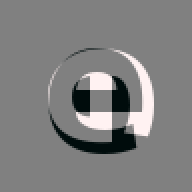

In [20]:
# These commands should work on anything Julia understands. 
# Here is a trivial example calculating a gradient using Flux, 
# aiming to minimise the difference between an image and its transpose: 

function loss_one(img) 
    @cast transposed[c, w,h] := img[c, h,w]
    sum((transposed .- img ).^2) 
end

using Flux 

trgrad = Flux.gradient(loss_one, six[1])[1].data

@show extrema(trgrad)

colorview(RGB, trgrad ./8 .+ 0.5 )

┌ Info: Recompiling stale cache file /Users/me/.julia/compiled/v1.1/CuArrays/7YFE0.ji for CuArrays [3a865a2d-5b23-5a0f-bc46-62713ec82fae]
└ @ Base loading.jl:1184


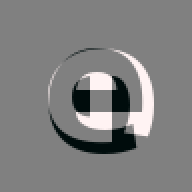

In [21]:
# Try the same thing on GPU? 
# It fails because PermutedDimsArray doesn't work well with Flux there... sorry

using CuArrays

cu_img = cu(six[1])

# cu_grad = Flux.gradient(loss_one, cu_img)[1].data

function loss_cu(img) 
    # @cast transposed[c, w,h] := img[c, h,w] # @pretty result below
    begin
        # local guineapig = PermutedDimsArray(img, (1, 3, 2)) # avoid this
        local guineapig = permutedims(img, (1, 3, 2))
        transposed = guineapig
    end
    return sum((transposed .- img ).^2) 
end

cu_grad = Flux.gradient(loss_cu, cu_img)[1].data

grad = collect(cu_grad) # back to CPU

colorview(RGB, grad ./8 .+ 0.5 )

In [22]:
# PermutedDimsArray(view(::CuArray{Float32,4}  works, but runs into some error in gradient calc. 

cu_img = cu(six[1])

@cast transposed[c, w,h] := cu_img[c, h,w]

3×96×96 PermutedDimsArray(view(::CuArray{Float32,4}, :, :, :, 1), (1, 3, 2)) with eltype Float32:
[:, :, 1] =
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0     
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961

[:, :, 2] =
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0     
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961

[:, :, 3] =
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0     
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961

...

[:, :, 94] =
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0     
 0.901961  0.901961  0.901961  0.901961     0.901961  0.901961  0.901961
 0.901961  0.901961  0.901961  0.901961   

## Help

In [23]:
?@cast

```
@cast Z[i,j,...] := f(A[j,k,...])  options
```

Macro for broadcasting, reshaping, and slicing of arrays in index notation. Understands the following things: 

  * `A[i,j,k]` is a three-tensor with these indices.
  * `B[(i,j),k]` is the same thing, reshaped to a matrix. Its first axis (the bracket) is indexed  by `n = i + (j-1) * N` where `i ∈ 1:N`. This may also be written `B[i\j,k]`.
  * `C[k][i,j]` is a vector of matrices.
  * `D[j,k]{i}` is an ordinary matrix of `SVector`s, which may be reinterpreted from `A[i,j,k]`.
  * `E[i,_,k]` has two nontrivial dimensions, and `size(E,2)==1`. On the right hand side  (or when writing to an existing array) you may also write `E[i,3,k]` meaning `view(E, :,3,:)`, or `E[i,$c,j]` to use a variable `c`. Fixing inner indices, like `C[k][i,_]`, is not allowed.
  * `F[i,-j,k]` means `reverse(F, dims=2)`.

The left and right hand sides must have all the same indices.  See `@reduce` for a related macro which can sum over things. 

If several tensors appear on the right hand side, then this represents a broadcasting operation,  and the necessary re-orientations of axes are automatically inserted. 

The following actions are possible:

  * `=` writes into an existing array.
  * `:=` creates a new object... which may or may not be a view of the input:
  * `==` insists on a view of the old object (error if impossible), and `|=` insists on a copy.

Options can be specified at the end (if several, separated by `,` i.e. `options::Tuple`)

  * `i:3` supplies the range of index `i`. Variables `j:rangej` and functions `k:length(K)` are allowed.
  * `assert` or `!` will turn on explicit dimension checks.
  * `cat` will glue slices by things like `hcat(A...)` instead of `reduce(hcat, A)`, and `lazy` will instead make a `VectorOfArrays` container.
  * `strided` will place `@strided` in front of broadcasting operations,  and use `@strided permutedims(A, ...)` instead of `PermutedDimsArray(A, ...)`.

Static slices `D[j,k]{i}` need `using StaticArrays`, and to create them you should give all  slice dimensions explicitly. You may write `D[k]{i:2,j:2}` to specify `Size(2,2)` slices.


In [24]:
?@reduce

```
@reduce A[i] := sum(j,k) B[i,j,k]             # A = vec(sum(B, dims=(2,3))) 
@reduce A[i] := prod(j) B[i] + ε * C[i,j]     # A = vec(prod(B .+ ε .* C, dims=2))
@reduce A[i] = sum(j) exp( C[i,j] / D[j] )    # sum!(A, exp.(C ./ D') )
```

Tensor reduction macro:

  * The reduction function can be anything which works like `sum(B, dims=(1,3))`,  for instance `prod` and `maximum` and `Statistics.mean`.
  * In-place operations `Z[j] = sum(...` will construct the banged version of the given function's name,  which must work like `sum!(Z, A)`.
  * The tensors can be anything that `@cast` understands, including gluing of slices `B[i,k][j]`  and reshaping `B[i\j,k]`.
  * Index ranges may be given afterwards (as for `@cast`) or inside the reduction `sum(i:3, k:4)`.
  * All indices appearing on the right must appear either within `sum(...)` etc, or on the left.

```
F = @reduce sum(i,j)  B[i] + γ * D[j]         # sum(B .+ γ .* D')
@reduce G[] := sum(i,j)  B[i] + γ * D[j]      # F == G[]
```

Complete reduction to a scalar output `F`, or a zero-dim array `G`. 

```
@reduce Z[k] := sum(i,j) A[i] * B[j] * C[k]  lazy, i:N, j:N, k:N
```

The option `lazy` replaces the broadcast expression with a `BroadcastArray`,  to avoid `materialize`ing the entire array (here size `N^3`) before summing. 

The option `strided` will place `@strided` in front of the broadcasting operation.  You need `using Strided` for this to work. 


In [25]:
?@check!

```
@check!(A[i, j, μ, ν])
```

Adds `A` to the store of known tensors, and records that it expects indices `i,j,μ,ν`. If it is already in the store, then instead this checks whether the present indices differ  from the saved ones. Only the first letter is examined: `α` and `α2` are similar, as are nearby  letters `β`, `γ3`. More complicated indices like `Z[(i,j), -k, _, 3]` will be ignored.  This happens while parsing your source code, there is zero run-time penalty. Returns `A`.

In addition, with `size=true` option, it can insert size checks to be performed at run-time, by returning `check!(A, stuff)`.  At the first occurrance this saves `i: => size(A,1)` etc., and on subsequent uses of  the same index (even on different tensors) it gives an error if the sizes do not match.  Here the whole index is used: `α`, `β` and `β2` may have different ranges.  This will need to look up indices in a dictionary, which takes ... 50ns, really? 

```
@check! B[i,j] C[μ,ν] D[i] E[j]
```

Checks several tensors, returns nothing. 

```
@check!  alpha=true  tol=3  size=false  throw=false  info  empty
```

Controls options for `@check!` and related macros (`@shape!`, `@reduce!`, `@einsum!` etc).  These are the default settings:

  * `alpha=true` turns on the parse-time checking, based on index letters.
  * `tol=3` sets how close together letters must be: `B[j,k]` is not an error but `B[a,b]` will be.
  * `size=false` turns off run-time size checking.
  * `throw=false` means that errors are given using `@error`, without interrupting your program.
  * `empty` deletes all saved letters and sizes – there is one global store for each, for now.
  * `info` prints what's currently saved.

```
@cast! B[i,j] := D[i] * E[j]
@reduce! B[i,j] := sum(μ,ν) A[i,j,μ,ν] / C[μ,ν]

@einsum!  B[i,j] := D[i] * E[j]
@vielsum! B[i,j] := D[i] * E[j]
@tensor!  B[i,j] := D[i] * E[j]
```

Versions of the macros from this package, and from Einsum.jl and TensorOperations.jl,  which call `@check!` on each of their tensors, before proceeding as normal. 
